In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

We used Excel to clean the original .csv-file. We separated the columns into acutal columns as well as renamed the first column to Index (we might delete this column later on, since the dataset is inherently indexed).

In [16]:
# Loading the dataset into a variable

# df = pd.read_excel("diamonds_cleaned.xlsx")
df = pd.read_csv("diamonds.csv")

In [17]:
df.columns

Index(['"id","carat","cut","color","clarity","depth","table","price","x","y","z"'], dtype='object')

In [18]:
df

,"""id"",""carat"",""cut"",""color"",""clarity"",""depth"",""table"",""price"",""x"",""y"",""z"""
0,"1,0.23,""Ideal"",""E"",""SI2"",61.5,55,326,3.95,3.98..."
1,"2,0.21,""Premium"",""E"",""SI1"",59.8,61,326,3.89,3...."
2,"3,0.23,""Good"",""E"",""VS1"",56.9,65,327,4.05,4.07,..."
3,"4,0.29,""Premium"",""I"",""VS2"",62.4,58,334,4.2,4.2..."
4,"5,0.31,""Good"",""J"",""SI2"",63.3,58,335,4.34,4.35,..."
...,...
53935,"53936,0.72,""Ideal"",""D"",""SI1"",60.8,57,2757,5.75..."
53936,"53937,0.72,""Good"",""D"",""SI1"",63.1,55,2757,5.69,..."
53937,"53938,0.7,""Very Good"",""D"",""SI1"",62.8,60,2757,5..."
53938,"53939,0.86,""Premium"",""H"",""SI2"",61,58,2757,6.15..."


In [10]:
# Droppade all data då den låg i en samlad kolumn.

# df.drop(df.columns[[0]], axis=1, inplace=True)

### -= Overview and meta analysis =-

Firstly, let's get an overview of the dataset.

In [13]:
# Using the describe() function to list metadata on the set.

df.describe()

,",""carat"",""cut"",""color"",""clarity"",""depth"",""table"",""price"",""x"",""y"",""z"""
count,53940
unique,53940
top,"32153,0.28,""Ideal"",""F"",""VVS2"",61.8,56,787,4.18..."
freq,1


As we can see there are 8 coulumns and about 54'000 rows of data in our chosen set (diamonds.csv). Let's do some more exploring!

In [5]:
# Using the info() to get more basic info about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Now we know the datatypes of each column. This information also indicates that there are no nullvalues in this set. But let's double check that!

In [6]:
# Using the isnull() and sum() functions to check for nullvalues and sum them.

df.isnull().sum()

Index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Now we know for sure that there are no nullvalues in this set.

Let's take a closer look at the acutal data.

In [7]:
# Displaying the first and last 5 rows in the set

df

,Index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Now we have a sense of how the dataset is structured. As we can see there is a column named index, this is a remnant from the original .csv-file and it is pretty unnecessary since the set is indexed in itself.
<br>We could have removed this column when we prepared the dataset in Excel, but we wanted to try removing it using pandas instead.

In [8]:
# Using the drop() function to remove the Index-column from the dataframe. 
# We don't remove it from the actual dataset (not specifing "inplace='True'" as a parameter in the drop-function), it just won't appear for us when we work with the datset within this program.

df.drop('Index', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
# FÖRSLAG TILL PLAN FRAMÅT:
# Om vi kan dels ta ut alla varianter av enskilda värden på t ex cut, color och clarity så vi vet vilken som är "bäst" -> "sämst" så kan vi göra correlationer och grafer mot t ex pris.
# Vi kan också skriva en funktion som räknar ut volymen på en sten baserad på x, y och z för att därifrån korrelera mot pris (visserligen kan man hävda att carat i sig är ett mått på vikten och därmed i viss mån av storleken).
#
# Vad tror ni? :) // Edvin

In [10]:
df_test_cut = df.sort_values(['cut'], ascending=True)

In [11]:
df_test_count = df['cut'].unique()
print(df_test_count)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [12]:
df_sort_color = df['color'].unique()
print(df_sort_color)

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [13]:
# In order to use the corr()-function we had to convert the stringvalues of the cut-column to integers.

df["cut"].replace({"Ideal":0,"Premium":1,"Very Good":2,"Good":3,"Fair":5}, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df.corr()

,carat,cut,depth,table,price,x,y,z
carat,1.000000,0.138174,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.138174,1.000000,0.241935,0.419729,0.052264,0.127870,0.122393,0.154108
depth,0.028224,0.241935,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.419729,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.052264,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.127870,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.122393,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.154108,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [16]:
df_sort_clarity = df['clarity'].unique()
df_sort_clarity

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [17]:
df["clarity"].replace({"SI2":7 , "SI1":6 , "VS1":4 , "VS2":5 , "VVS2":3 , "VVS1":2 , "I1":9 , "IF":1},inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,D,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,D,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,7,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
df_sort_color = df['color'].unique()
df_sort_color

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [19]:
# forts för hela färgskalan ,"K":7,"L":8,"M":9,"N":10,"O":11,"P":12,"Q":13,"R":14,"S":15,"T":16,"U":17,"V":18,"W":19,"X":20,"Y":21,"Z":22

df["color"].replace({"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,7,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.138174,0.291437,0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.138174,1.000000,0.022784,0.195684,0.241935,0.419729,0.052264,0.127870,0.122393,0.154108
color,0.291437,0.022784,1.000000,-0.023079,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,0.355074,0.195684,-0.023079,1.000000,0.071840,0.160630,0.144217,0.373021,0.359150,0.368309
depth,0.028224,0.241935,0.047279,0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.419729,0.026465,0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.052264,0.172511,0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.127870,0.270287,0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.122393,0.263584,0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.154108,0.268227,0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

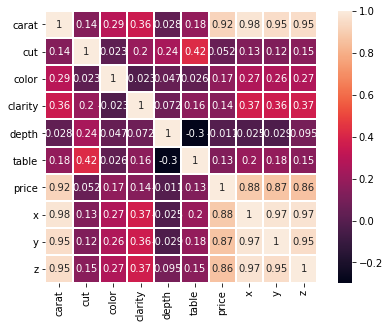

In [21]:
data_corr = df.corr()

mpl.pyplot.figure(figsize=(7.5,5))
sns.heatmap(data_corr,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True)
sns.heatmap